In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

### Análisis de Forecasting del Registro Mensual de Vehículos Matriculados en Cataluña ###

El objetivo de este análisis es realizar un forecasting sobre el número de vehículos matriculados en Cataluña, utilizando datos mensuales desde 1970 hasta 2012. 

**Datos y Periodo de Estudio:**

Los datos utilizados abarcan desde 1970 hasta 2012, proporcionando un amplio conjunto de información histórica.
La serie temporal mensual nos permite capturar patrones estacionales y tendencias a lo largo del tiempo.

**Metodología:**

- **Análisis Exploratorio de Datos (EDA):** Antes de realizar cualquier pronóstico, es crucial comprender la naturaleza de los datos. Esto incluye verificar la estacionalidad, tendencias y posibles outliers.

- **Selección del Modelo:** El modelo que voy a utilizar va a ser el SARIMA (seasonal ARIMA). Al utilizar el modelo SARIMA, lo que pretengo es aprovechar su capacidad para capturar tanto la autocorrelación temporal como la estacional, lo que debería proporcionar pronósticos precisos y útiles para el análisis de forecasting sobre el registro mensual de vehículos matriculados en Cataluña. 

- **Validación del Modelo:** Después de ajustar el modelo a los datos históricos, validarEMOS su rendimiento utilizando técnicas como la validación cruzada o dividiendo los datos en conjuntos de entrenamiento y prueba.

- **Pronóstico y Evaluación:** Una vez validado el modelo, realizaré pronósticos futuros sobre el número de vehículos matriculados en Cataluña. Es importante evaluar la precisión de estos pronósticos utilizando métricas como el error cuadrático medio (MSE) o el error absoluto medio (MAE).

1) **Exploración de Datos:** 

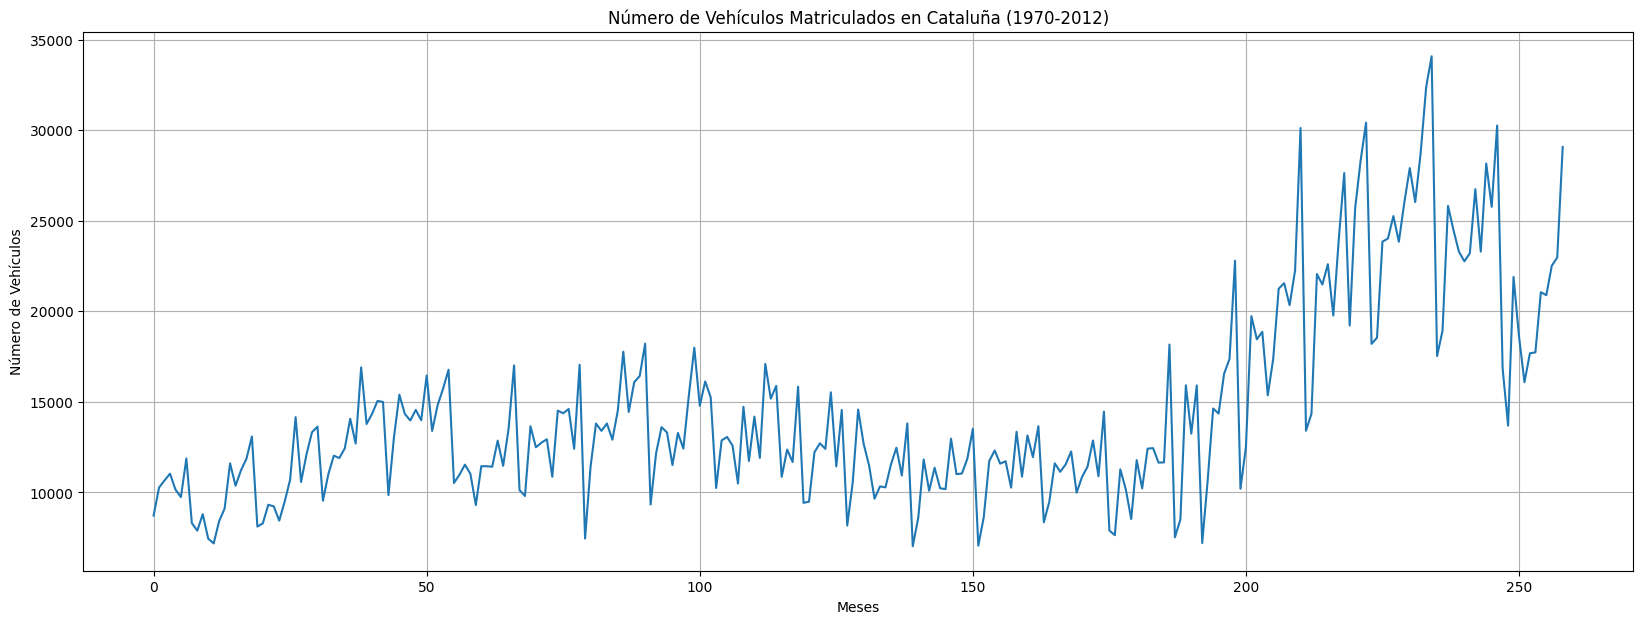

In [18]:
# Datos
data = [8724, 10273, 10666, 11036, 10161, 9743, 11876, 8309, 7892, 8801, 7450, 7186, 8418, 9110, 11607, 
        10372, 11223, 11863, 13089, 8116, 8297, 9321, 9234, 8445, 9494, 10709, 14159, 10582, 12111, 13324, 
        13634, 9544, 11016, 12032, 11901, 12431, 14067, 12701, 16905, 13778, 14341, 15054, 14997, 9856, 13027, 
        15399, 14335, 13974, 14559, 13988, 16459, 13398, 14813, 15727, 16777, 10524, 10977, 11535, 11032, 9306, 
        11450, 11447, 11422, 12865, 11469, 13529, 17016, 10130, 9807, 13655, 12495, 12747, 12937, 10867, 14516, 
        14374, 14608, 12413, 17051, 7456, 11405, 13806, 13402, 13807, 12914, 14529, 17770, 14449, 16091, 16425,
        18217, 9335, 12160, 13606, 13313, 11512, 13288, 12420, 15359, 17991, 14788, 16128, 15253, 10246, 12873,
        13063, 12590, 10493, 14729, 11737, 14187, 11908, 17098, 15181, 15882, 10862, 12369, 11682, 15839, 9425, 
        9492, 12226, 12714, 12404, 15530, 11438, 14554, 8170, 10538, 14576, 12695, 11492, 9657, 10334, 10281, 
        11537, 12471, 10939, 13814, 7032, 8589, 11821, 10094, 11365, 10234, 10182, 12972, 11010, 11048, 11874, 
        13513, 7062, 8640, 11733, 12317, 11591, 11722, 10269, 13351, 10871, 13148, 11949, 13661, 8356, 9492, 11609, 
        11142, 11550, 12265, 9991, 10861, 11426, 12870, 10891, 14464, 7899, 7643, 11279, 10177, 8536, 11786, 10228, 
        12420, 12446, 11648, 11659, 18167, 7525, 8506, 15915, 13248, 15909, 7210, 10681, 14634, 14356, 16551, 17376, 
        22797, 10204, 12513, 19732, 18458, 18867, 15363, 17383, 21249, 21555, 20342, 22260, 30121, 13408, 14345, 22060, 
        21480, 22603, 19768, 23975, 27634, 19217, 25698, 28324, 30418, 18205, 18544, 23849, 24018, 25258, 23843, 26004, 
        27906, 26034, 28759, 32381, 34085, 17530, 18939, 25824, 24485, 23296, 22763, 23213, 26745, 23296, 28160, 25769, 
        30262, 16853, 13691, 21898, 18618, 16088, 17684, 17735, 21058, 20892, 22519, 22973, 29076]

# Graficar la serie temporal
plt.figure(figsize=(20,7))
plt.plot(data)
plt.title('Número de Vehículos Matriculados en Cataluña (1970-2012)')
plt.xlabel('Meses')
plt.ylabel('Número de Vehículos')
plt.grid(True)
plt.show()

2) **Selección del Modelo:** 

El parámetro m en el modelo auto_arima de la biblioteca pmdarima se utiliza para especificar el número de periodos en un ciclo estacional. Este parámetro es crucial para capturar la estacionalidad en los datos de series temporales. Cambiar el valor de m ajusta la longitud del ciclo estacional que el modelo intenta capturar. Aquí tienes lo que significa aumentar o disminuir m:

- Aumentar m:

Mayor periodicidad: Un valor más alto de m indica un ciclo estacional más largo. Por ejemplo, si m=12, el modelo intentará capturar un patrón estacional que se repite cada 12 periodos, adecuado para datos mensuales con estacionalidad anual.
Aplicación: Esto es útil cuando se espera que los datos tengan estacionalidad en periodos largos, como ventas anuales, temperaturas anuales, etc.

- Disminuir m:

Menor periodicidad: Un valor más bajo de m indica un ciclo estacional más corto. Por ejemplo, si m=7, el modelo intentará capturar un patrón estacional que se repite cada 7 periodos, adecuado para datos diarios con estacionalidad semanal.
Aplicación: Esto es útil cuando se espera que los datos tengan estacionalidad en periodos cortos, como ventas diarias con patrones semanales, tráfico de sitios web semanal, etc.

Ejemplos de m:

Diario con estacionalidad semanal (m=7): Captura patrones que se repiten cada semana.
Mensual con estacionalidad anual (m=12): Captura patrones que se repiten cada año.
Trimestral con estacionalidad anual (m=4): Captura patrones que se repiten cada año (4 trimestres en un año).

Consecuencias de elegir un m incorrecto:

Subestimación de la estacionalidad: Si m es demasiado pequeño, el modelo no capturará la estacionalidad real, lo que puede llevar a predicciones inexactas.
Sobreestimación de la estacionalidad: Si m es demasiado grande, el modelo puede intentar capturar patrones que no existen, lo que puede introducir ruido y reducir la precisión de las predicciones.

In [19]:
model = auto_arima(data, seasonal=True, m=12)  # m=12 para capturar la estacionalidad anual
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/arima.py", line 510, in

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  259
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2312.635
Date:                            Wed, 12 Jun 2024   AIC                           4637.269
Time:                                    19:09:15   BIC                           4658.587
Sample:                                         0   HQIC                          4645.841
                                            - 259                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2739      0.143     -1.915      0.056      -0.554       0.006
ar.L2         -0.2236      0.085   

In [20]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_size = int(len(data) * 0.8)  # Proporción del 80% para entrenamiento
train_data = data[:train_size]
test_data = data[train_size:]

p=2
d=1
q=1
P=2
D=0
Q=1
m=12

# Ajustar el modelo SARIMA al conjunto de entrenamiento
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m)).fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97451D+00    |proj g|=  5.91937D-02


 This problem is unconstrained.



At iterate    5    f=  8.95731D+00    |proj g|=  2.26347D-02

At iterate   10    f=  8.95185D+00    |proj g|=  7.04099D-03

At iterate   15    f=  8.94888D+00    |proj g|=  7.38645D-04

At iterate   20    f=  8.94887D+00    |proj g|=  1.54403D-03

At iterate   25    f=  8.94804D+00    |proj g|=  1.47481D-02

At iterate   30    f=  8.88387D+00    |proj g|=  6.33351D-02

At iterate   35    f=  8.86539D+00    |proj g|=  7.46005D-03

At iterate   40    f=  8.85486D+00    |proj g|=  9.57615D-02

At iterate   45    f=  8.82170D+00    |proj g|=  2.15491D-02

At iterate   50    f=  8.82082D+00    |proj g|=  1.09140D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3) **Validación del Modelo:**

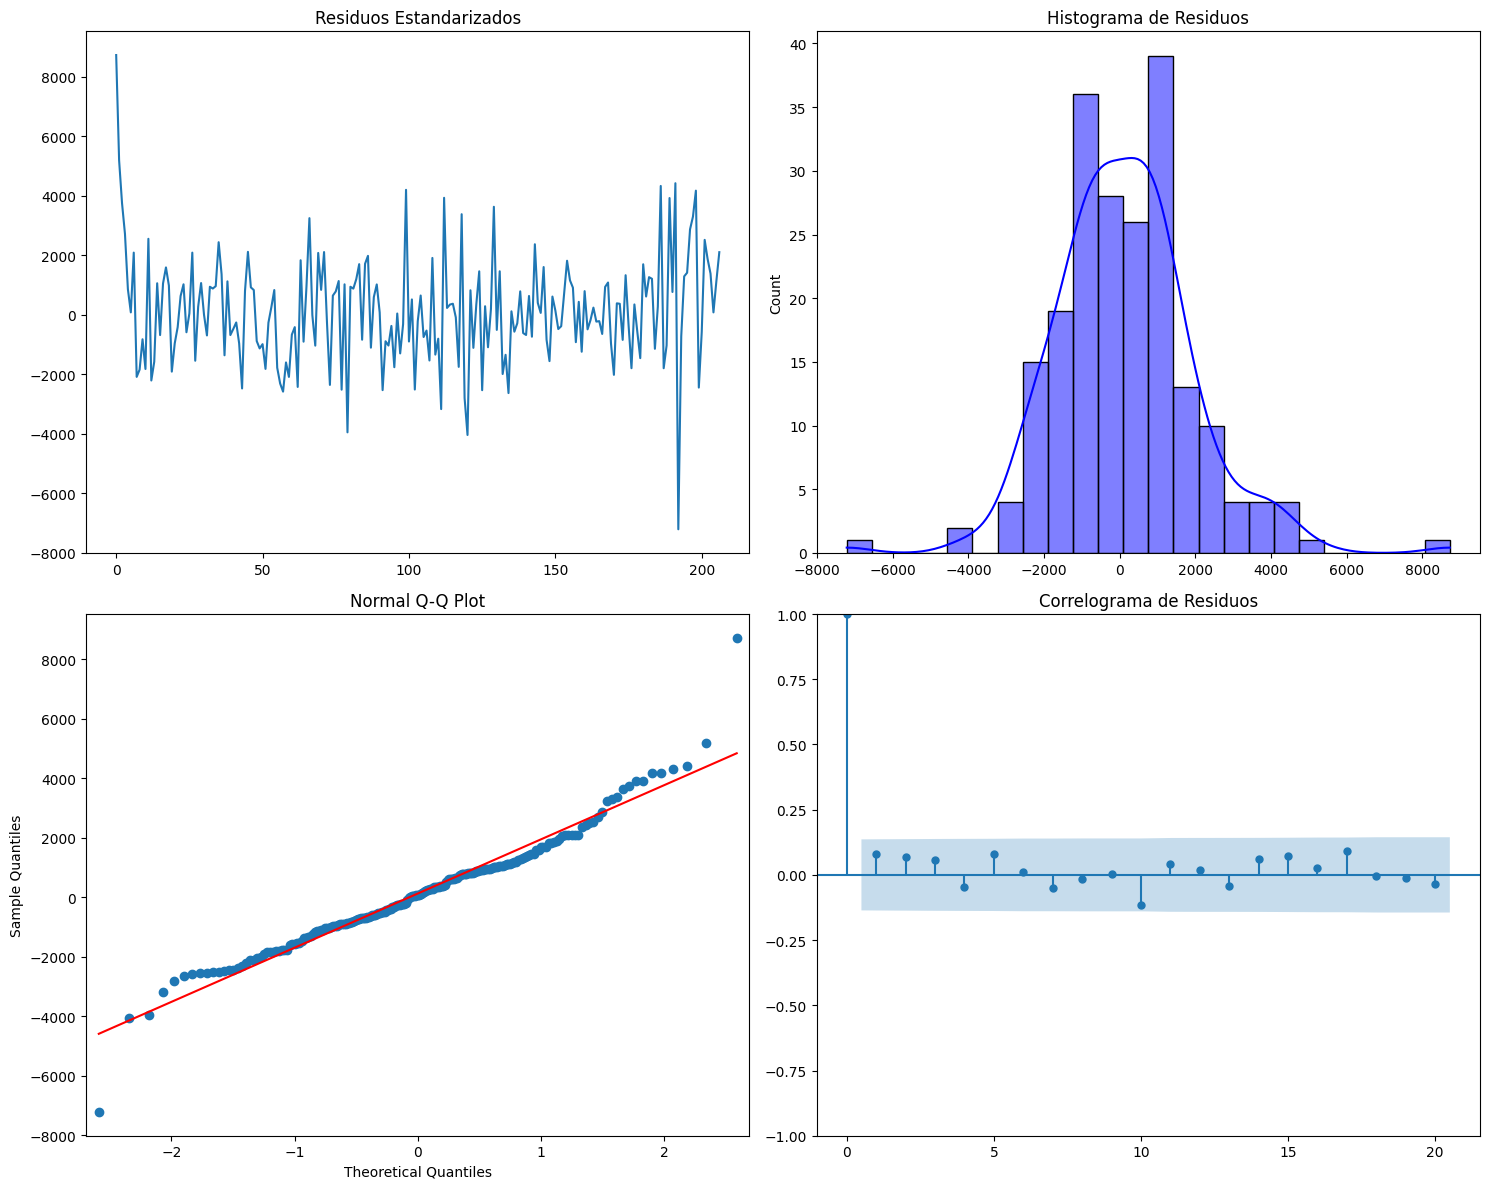

In [21]:
# Obtener los residuos del modelo
residuals = model.resid

# Crear subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Gráfico de residuos estandarizados
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuos Estandarizados')

# Histograma comparado con la normal
sns.histplot(residuals, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Histograma de Residuos')

# Normal Q-Q plot
qqplot(residuals, line='s', ax=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q Plot')

# Correlograma de los residuos
plot_acf(residuals, lags=20, ax=axes[1, 1])
axes[1, 1].set_title('Correlograma de Residuos')

plt.tight_layout()
plt.show()

**Gráfico Q-Q:**

Patrón esperado: En un gráfico Q-Q ideal, los puntos deberían seguir aproximadamente una línea diagonal, lo que indica una distribución normal de los residuos.

Observaciones: Observamos que hay puntos que se desvían significativamente de la línea diagonal, especialmente en las colas de la distribución, esto podría indicar que los residuos no se ajustan bien a una distribución normal, lo cual es deseable para muchos métodos estadísticos.

**Residuos Estandarizados:**

Patrón esperado: Los residuos estandarizados deben mostrar un patrón aleatorio y uniforme alrededor de cero a lo largo del rango de valores pronosticados.

Observaciones: Observamos un patrón no aleatorio en los residuos estandarizados durante todo el gráfico menos al principio y al final del donde se pueden observar que se desvían de la media. Esto podría indicar una falta de homogeneidad en la varianza de los residuos o una violación de otras suposiciones del modelo. Esto puede sugerir que el modeo no está capturando adecuadamente la variabilidad en los datos.


In [22]:
# Pronósticos del modelo en el conjunto de prueba
predictions = model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

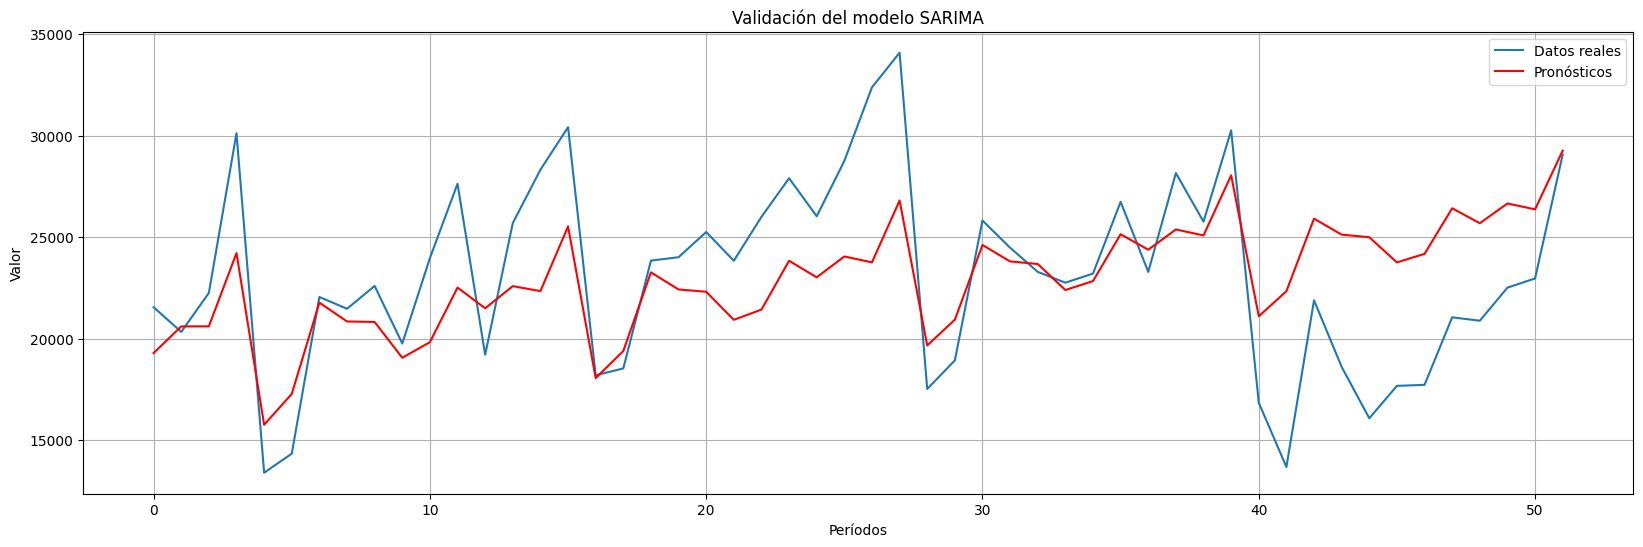

In [23]:
# Gráfico de pronósticos vs datos reales
plt.figure(figsize=(20, 6))
plt.plot(test_data, label='Datos reales')
plt.plot(predictions, color='red', label='Pronósticos')
plt.title('Validación del modelo SARIMA')
plt.xlabel('Períodos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


4) **Pronóstico y Evaluación:**

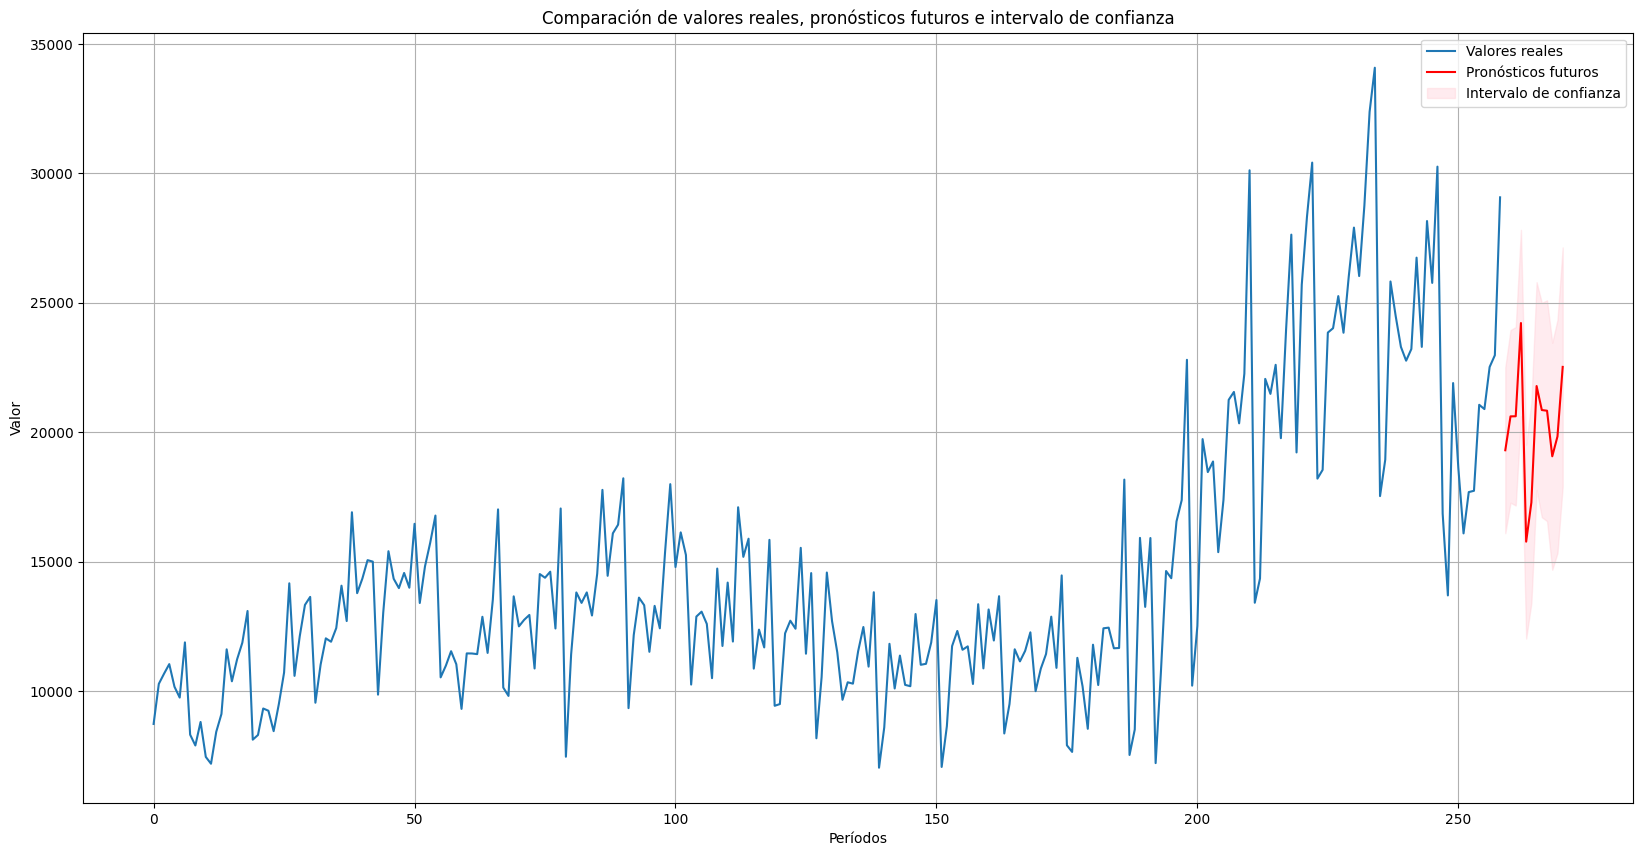

In [24]:
# Número de períodos que deseas pronosticar en el futuro
num_periods = 12  # Por ejemplo, pronóstico para los próximos 12 meses

# Pronósticos futuros utilizando el modelo SARIMA
forecast = model.forecast(steps=num_periods)

# Calcular intervalos de confianza
forecast_values = forecast
confidence_intervals = model.get_forecast(steps=num_periods).conf_int()

# Crear un rango de índices para los períodos pronosticados
index_forecast = range(len(data), len(data) + num_periods)

# Graficar los valores reales, los pronósticos futuros y los intervalos de confianza
plt.figure(figsize=(20, 10))
plt.plot(data, label='Valores reales')
plt.plot(index_forecast, forecast_values, color='red', label='Pronósticos futuros')
plt.fill_between(index_forecast, confidence_intervals[:, 0], confidence_intervals[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Comparación de valores reales, pronósticos futuros e intervalo de confianza')
plt.xlabel('Períodos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Crear un DataFrame con los valores reales y los pronósticos
df_forecast = pd.DataFrame({'Valores reales': data[-num_periods:], 'Pronósticos futuros': forecast_values})

# Mostrar el DataFrame
print(df_forecast)

    Valores reales  Pronósticos futuros
0            16853         19301.420134
1            13691         20610.525953
2            21898         20614.874709
3            18618         24218.311978
4            16088         15768.986025
5            17684         17286.378481
6            17735         21782.413995
7            21058         20855.149319
8            20892         20829.483462
9            22519         19067.690107
10           22973         19835.190872
11           29076         22522.915637


In [26]:
# Tomar los últimos 12 meses de los datos originales como datos de prueba
test_data = data[-num_periods:]

# Calcular métricas de evaluación
mse = mean_squared_error(test_data, forecast_values)
mae = mean_absolute_error(test_data, forecast_values)
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100

# Imprimir métricas
print("Error cuadrático medio (MSE)", mse)
print("Error absoluto medio (MAE):", mae)
print("Error porcentual absoluto medio (MAPE):", mape)

Error cuadrático medio (MSE) 14022607.971358823
Error absoluto medio (MAE): 2868.5836207039915
Error porcentual absoluto medio (MAPE): 15.070556087384452


## Conclusiones ##

En este caso, el MAPE es del 15.65%, lo que significa que, en promedio, los pronósticos del modelo tienen un error del 15.65% en relación con los valores reales.

El MAE de aproximadamente 2868.58 indica que, en promedio, las predicciones del modelo están desviadas en alrededor de 2868.58 unidades de los valores reales. 

En definitiva, el modelo SARIMA no consigue hacer predicciones consistentes por lo cual habría que ajustar el modelo o buscar otros modelos estadísticos que sean más precisos. 


